In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the Iris dataset
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                55500 non-null  object 
 1   age                 55500 non-null  int64  
 2   gender              55500 non-null  object 
 3   blood_type          55500 non-null  object 
 4   medical_condition   55500 non-null  object 
 5   date_of_admission   55500 non-null  object 
 6   doctor              55500 non-null  object 
 7   hospital            55500 non-null  object 
 8   insurance_provider  55500 non-null  object 
 9   billing_amount      55500 non-null  float64
 10  room_number         55500 non-null  int64  
 11  admission_type      55500 non-null  object 
 12  discharge_date      55500 non-null  object 
 13  medication          55500 non-null  object 
 14  test_results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
# df.drop(columns=['name', 'doctor', 'hospital', 'room_number', 'date_of_admission', 'discharge_date'], axis = 1, inplace = True)

In [8]:
df.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,admission_type,medication,test_results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 55500 non-null  int64  
 1   gender              55500 non-null  object 
 2   blood_type          55500 non-null  object 
 3   medical_condition   55500 non-null  object 
 4   insurance_provider  55500 non-null  object 
 5   billing_amount      55500 non-null  float64
 6   admission_type      55500 non-null  object 
 7   medication          55500 non-null  object 
 8   test_results        55500 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.8+ MB


In [10]:

df["billing_amount"].describe()

count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: billing_amount, dtype: float64

<Figure size 640x480 with 0 Axes>

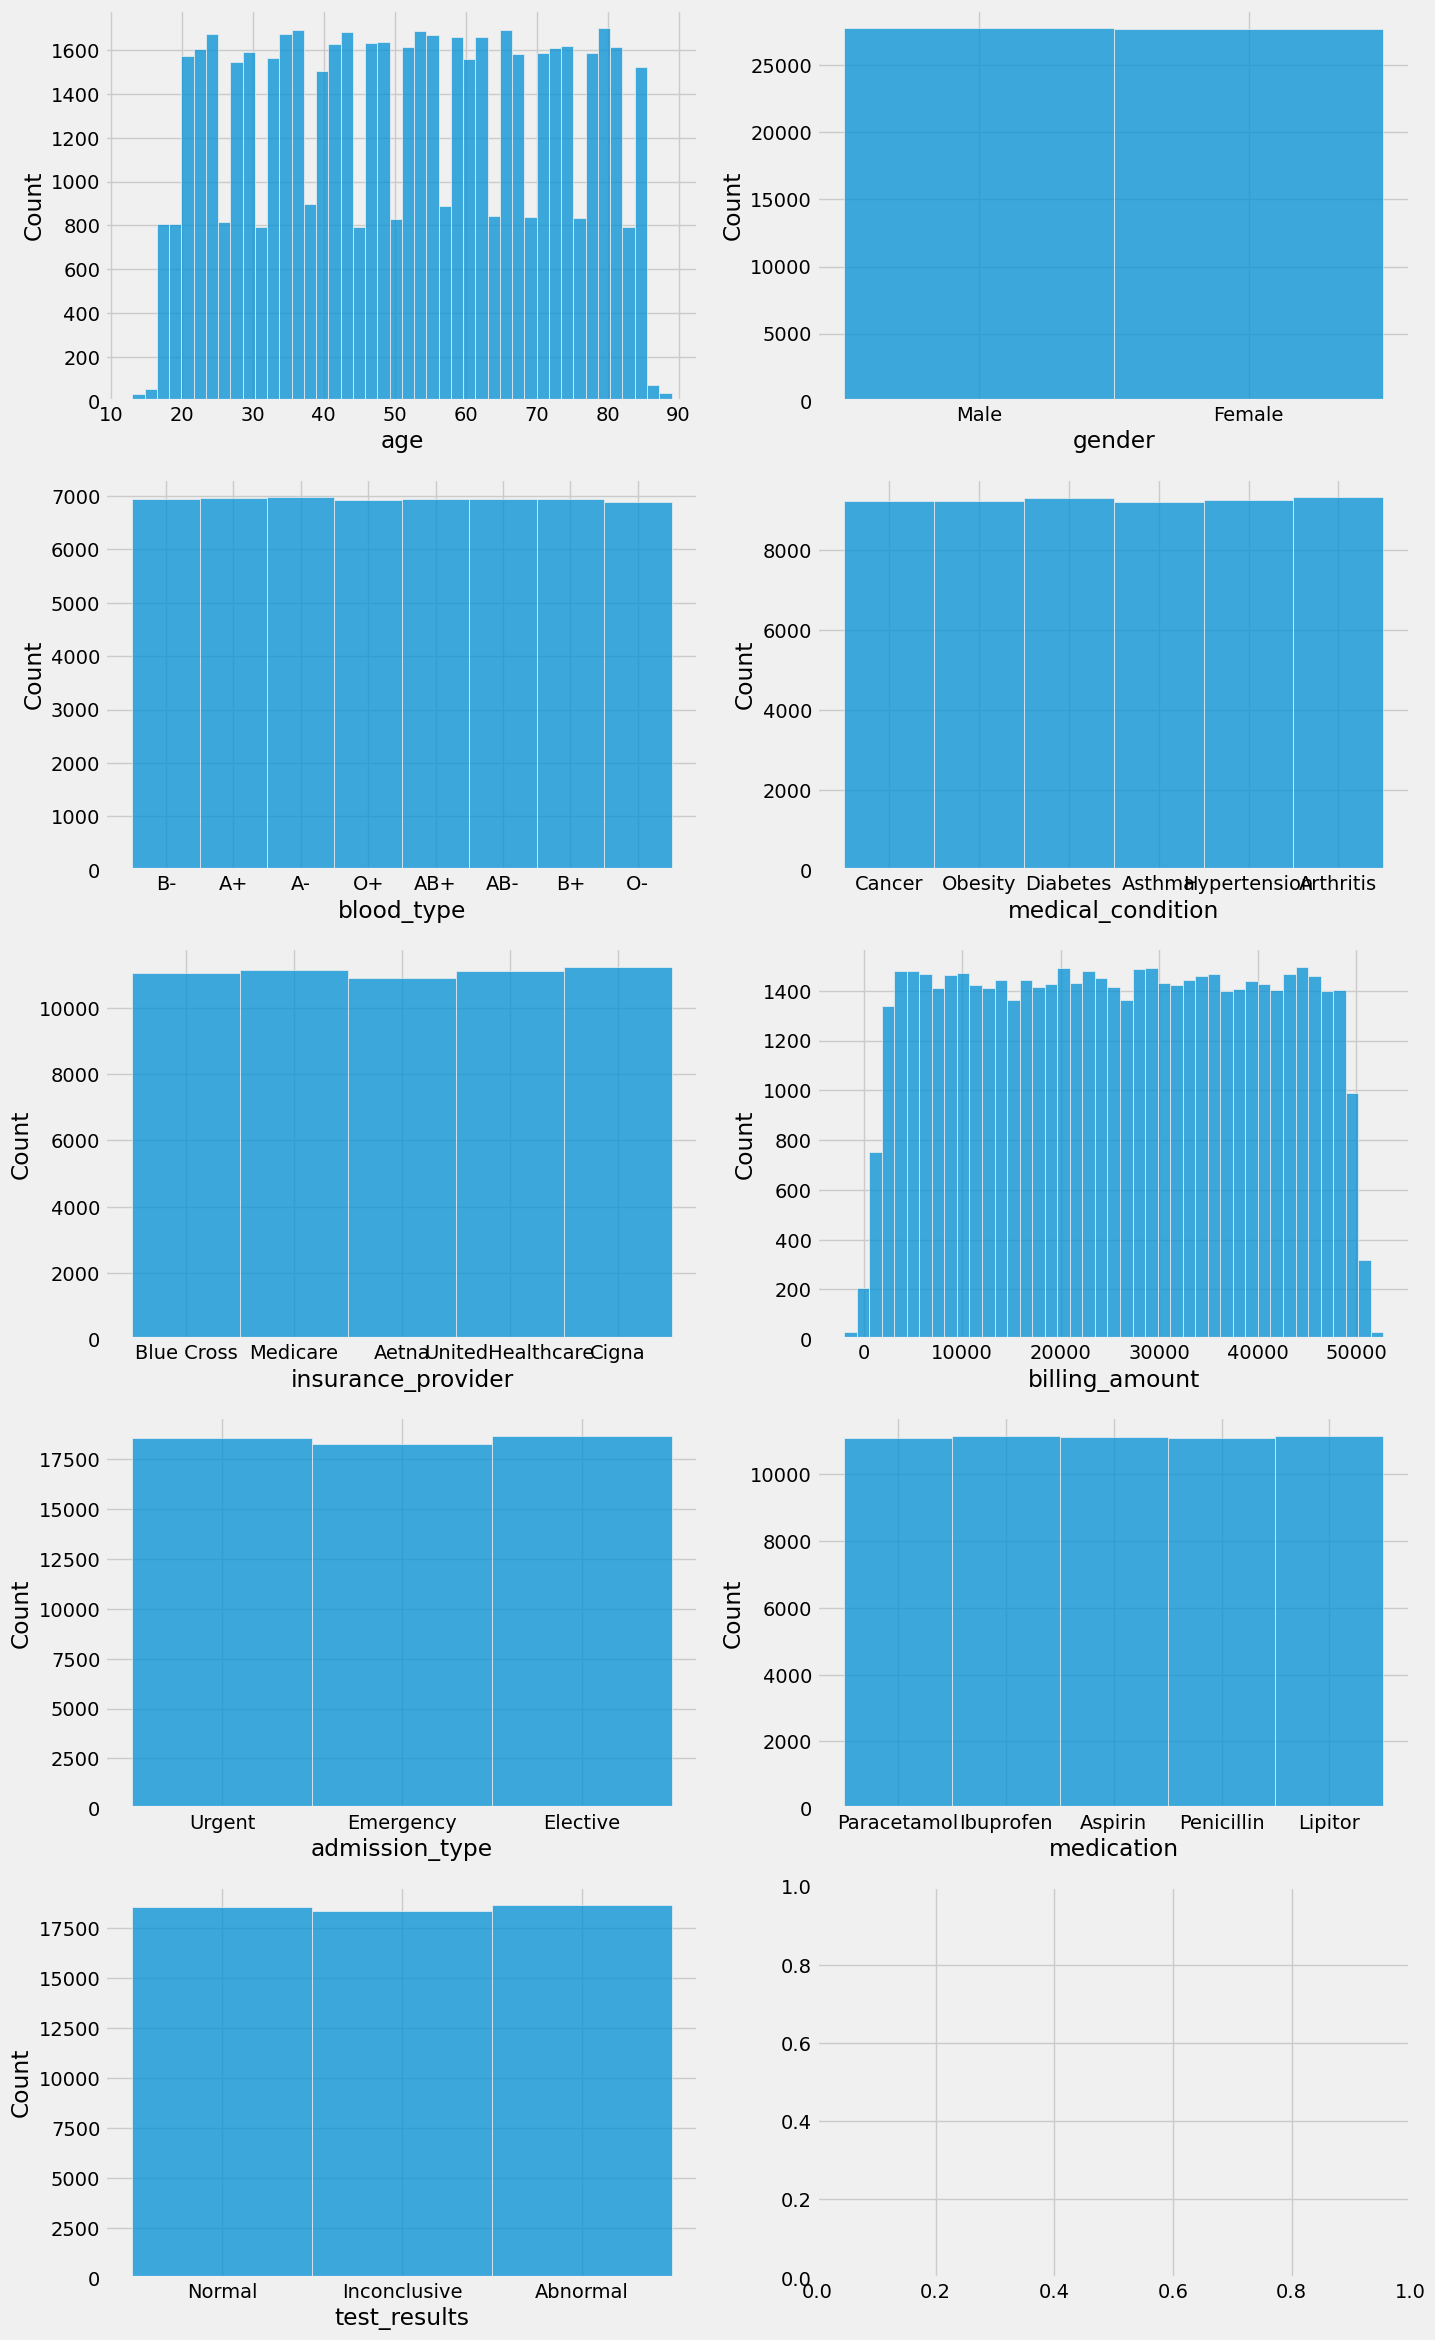

In [11]:
plt.style.use('fivethirtyeight')
plt.subplots_adjust(hspace=0.5)
fig, axs = plt.subplots(5, 2, figsize=(15, 28))
i = 0
for col in df.columns:    
    sns.histplot(data = df, x = col, ax = axs[i//2, i%2], palette = 'warm')
    i += 1
plt.show()

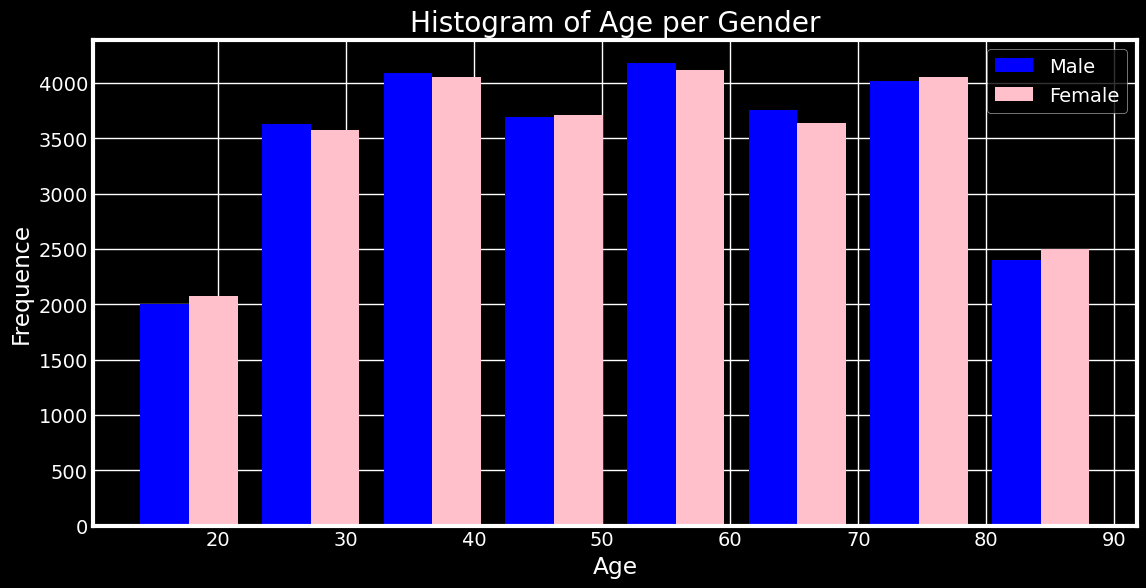

In [12]:
#Divide Age per Gender 
age_male = [df['age'][i] for i in range(len(df['age'])) if df['gender'][i] == 'Male']
age_female = [df['age'][i] for i in range(len(df['age'])) if df['gender'][i] == 'Female']

plt.style.use('dark_background')
plt.figure(figsize = (12, 6))
plt.hist([age_male, age_female], bins = 8, color = ['blue', 'pink'], label = ['Male', 'Female'])


plt.xlabel('Age')
plt.ylabel('Frequence')
plt.title('Histogram of Age per Gender')
plt.legend()

plt.show()

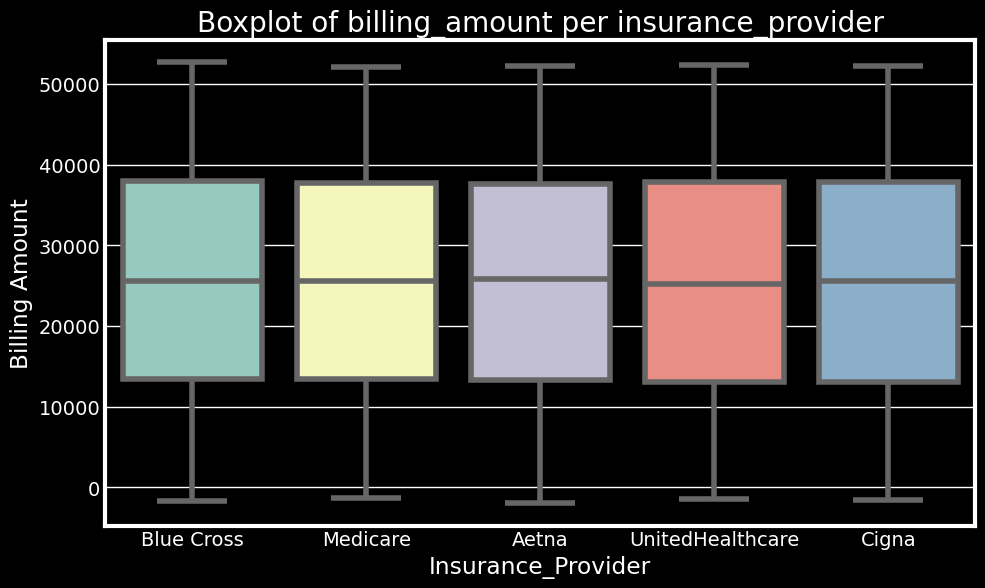

In [13]:
#BoxPlot of billing_amount per insurance_provider
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'insurance_provider', y = 'billing_amount')

plt.title('Boxplot of billing_amount per insurance_provider')
plt.xlabel('Insurance_Provider')
plt.ylabel('Billing Amount')

plt.show()

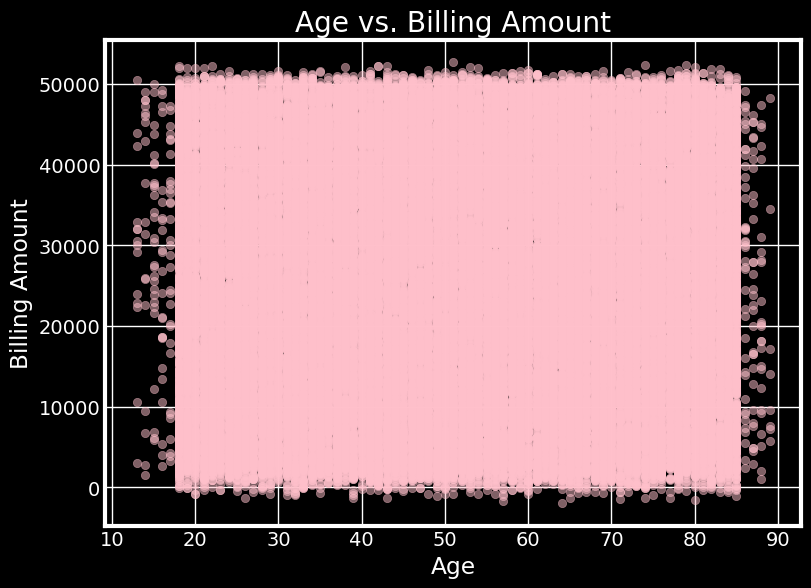

In [14]:
plt.style.use('dark_background')
plt.figure(figsize = (8, 6))
plt.scatter(df['age'], df['billing_amount'], alpha = 0.5, color = 'pink')
plt.title('Age vs. Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

In [4]:
cat_cols = df.select_dtypes(include = ['object']).columns

# encode 
l = LabelEncoder()
for col in cat_cols: 
    l.fit(df[col])
    df[col] = l.transform(df[col])

<Axes: >

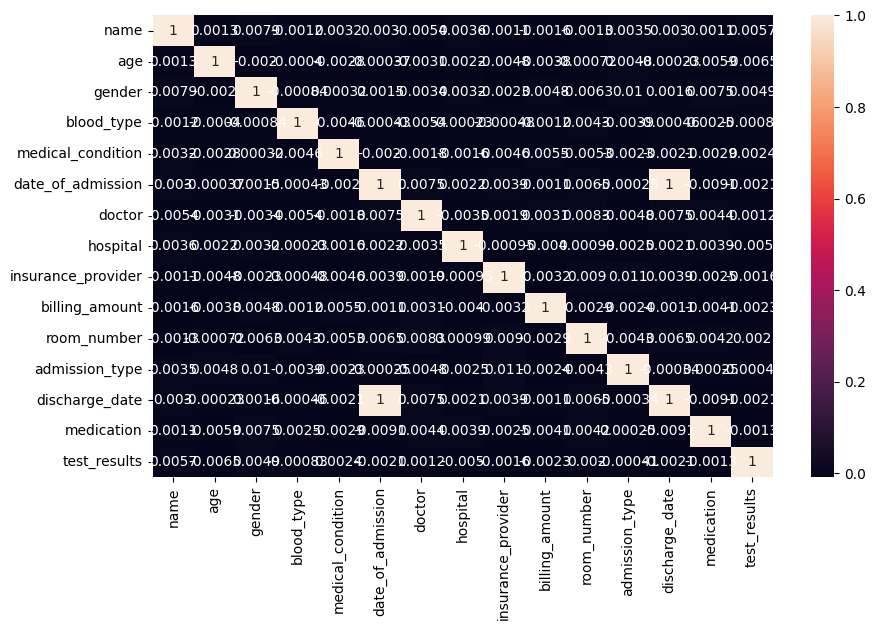

In [5]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

In [6]:
X = df.drop('test_results', axis = 1)
y = df['test_results']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1, random_state = 0)

scaler = StandardScaler()
xtrain_padronizado = scaler.fit_transform(xtrain)
xtest_padronizado = scaler.transform(xtest)

k = 3  
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(xtrain_padronizado, ytrain)
ypred = knn.predict(xtest_padronizado)

In [7]:
class_names = ['Normal', 'Abnormal', 'Inconclusive']
print('Classification Results\n')
print(classification_report(ytest, ypred, target_names=class_names))

Classification Results

              precision    recall  f1-score   support

      Normal       0.37      0.51      0.43      1831
    Abnormal       0.41      0.33      0.36      1876
Inconclusive       0.40      0.33      0.36      1843

    accuracy                           0.39      5550
   macro avg       0.39      0.39      0.38      5550
weighted avg       0.39      0.39      0.38      5550

